# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Вторая лабораторная работа </center>
# <center> Анализ сигналов </center>

In [414]:
import librosa
import numpy as np
import scipy 
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib

# Запретим numpy выполнять деление на 0
np.seterr(divide='raise', invalid='raise') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [415]:
import librosa.display
# Определим две функции для отрисовки сигнала.
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)

def draw_sig(frames, name=None, figsize=(14, 3)):
    # Отрисовка сигнала в виде "леденцов на палочке"
    plt.figure(figsize=figsize)
    plt.stem(frames)
    if name is not None:
        plt.legend([name])
    plt.xlabel("n")
    plt.ylabel("Energy")
    plt.show()
    

Создадим несколько простых сигналов. Они нам понадобятся для дальшейшего тестирования

In [416]:
signals = {}

### Единичный импульс

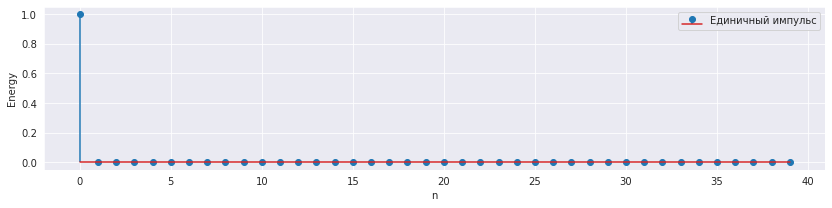

In [417]:
name = "Единичный импульс"
signals[name] = np.array([1] + [0]*39, dtype=float)
draw_sig(signals[name], name)

### Единичный скачок

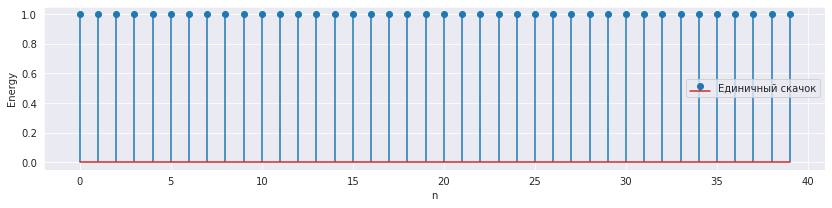

In [418]:
name = "Единичный скачок"
signals[name] = np.array([1]*40 ,dtype=float) 
draw_sig(signals[name], name)

### Синус

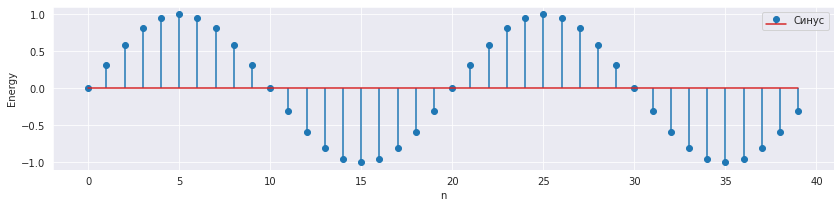

In [419]:
name = "Синус"
signals[name] = np.sin(np.pi * np.arange(40)/10)
draw_sig(signals[name], name)

### Шум

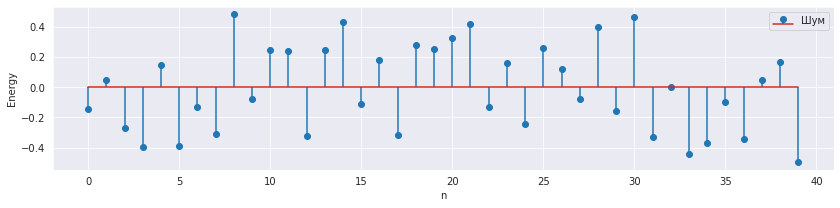

In [420]:
name = "Шум"
signals[name] = np.random.random(40)-0.5
draw_sig(signals[name], name)

-------------------------------
# Преобразование Фурье
Прежде, чем перейти к анализу сигналов, надо разобраться, что такое преобразование Фурье. 
> Преобразование Фурье (символ ℱ) — операция, сопоставляющая одной функции вещественной переменной другую функцию вещественной переменной. Эта новая функция описывает коэффициенты («амплитуды») при разложении исходной функции на элементарные составляющие — гармонические колебания с разными частотами (подобно тому, как музыкальный аккорд может быть выражен в виде суммы музыкальных звуков, которые его составляют). [Wiki](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5)



Формула прямого дискретного преобразования Фурье (ДПФ, Discrete Fourier Transform, DFT):
$$ X_k = \sum_{n=0}^{N-1} x_{n} \cdot e^{-i \frac{2\pi}{N} k n} $$


# Задание 1 (2 балла)
Реализовать дискретное преобразование Фурье. Сравнить с реализацией *scipy.fft.fft*

In [421]:
x = signals["Шум"]
def DFT(x):
    N = x.shape[0]
    nk = np.arange(N)
    L = np.exp(-2*np.pi*nk.reshape(-1, 1)*nk*1j/N)
    return L@x

Сравнение с библиотекой scipy

In [422]:
def test_DTF(x, transform=DFT):
    scipy_result = scipy.fft.fft(x)
    curr_result = transform(x)
    if scipy_result.shape != curr_result.shape:
        print("TEST_FAILED")
        print(f"Your spectrogram shape is {curr_result.shape}. "
              f"Scipy spectrogram shape is {scipy_result.shape}")
        return -1
    if not np.allclose(curr_result, scipy_result):
        print("TEST FAILED")
        print(f"scipy spectrogram: {scipy_result}")
        print(f"Your DTF spectrogram: {curr_result}")
        print(f"Average diff is {np.mean(np.abs(scipy_result - curr_result))}")
        return -2
    print("TEST PASSED")
    return 0

for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig) == 0, "Check you implementation"
print("All ok!")

Checking 'Единичный импульс'
TEST PASSED
Checking 'Единичный скачок'
TEST PASSED
Checking 'Синус'
TEST PASSED
Checking 'Шум'
TEST PASSED
All ok!


Класическое ДПФ имеет существенный недостаток - сложность алгоритма $O(N^2)$. На данный момент существуют чуть более сложные реализации преобразования Фурье, которые избавляются от квадратичной сложности. Например, алгоритм быстрого преобразования Фурье (Fast Fourier Transform, FFT) имеет сложность $O(N log(N))$, что делает его значительно более быстрым на длинных последовательностях. 

# Задание 1.1* (1 балл)
Реализовать быстрое преобразование Фурье. Сравнить с scipy.fft.fft

**Подсказка:** учтите, что для БПФ нам нужно, чтобы количество отсчетов сигнала было степенью двойки

In [423]:
def FFT(x):
    # YOUR CODE HERE
    
    #
    raise NotImplementedError()

In [424]:
for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig, transform=FFT) == 0, "Check you implementation"
print("All ok!")

Checking 'Единичный импульс'


NotImplementedError: 

Если вы изменяли длительность исходных сигналов, не забудьте вернуть их изначальную длительность

In [425]:
# YOUR CODE HERE

# Амплитудный и фазовый спектры
Поскольку преобразование Фурье определено в комплекстной области, анализировать результат напрямую проблематично. Для анализа сигналов принято разбивать результат преобразования Фурье на два спектра: амплитудный и фазовый. Амплитудный показывает, как меняется модуль сигнала, а фазовый - как меняется угол, образуемый на комплексной плоскости. 
# Задание 2 (1 балл)

Реализовать функции построения амплитудного и фазового спектра

In [426]:
#функция построения амплитудного спектра
def get_amplitude_from_spec(spec):
    return np.sqrt(spec.real**2 +spec.imag**2)
#функция построения фазового спектра
def get_phi_from_spec(spec):
    res = np.zeros_like(spec)
    for i, item in enumerate(spec):
        if item.real < 1e-15:
           res[i] = np.pi/2
        else:
            res[i] = item.imag/item.real
    return res

In [427]:
def check_mean_var(sig, mean=None, var=None):
    if mean is not None and np.mean(sig) != mean:
        print(f"Bad mean. Expected {mean}, got {np.mean(sig)}")
        return False
    if var is not None and np.var(sig) != var:
        print(f"Bad var. Expected {var}, got {np.var(sig)}")
        return False
    return True

_spec = scipy.fft.fft(np.array([1]+[0]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 0.0), \
    "Wrong Amplitude"
assert check_mean_var(get_phi_from_spec(_spec), 0.0, 0.0), \
    "Wrong Phase"

    
_spec = scipy.fft.fft(np.array([1]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 9.0), \
    "Wrong  Amplitude"
assert get_amplitude_from_spec(_spec)[0] == 10, \
    "Wrong Amplitude"
assert get_phi_from_spec(_spec)[0] == 0, \
    "Wrong phase"

_spec = scipy.fft.fft(scipy.fft.ifft(np.array([0] + [10+5j]+[0]*6 + [10-5j])))
assert get_amplitude_from_spec(_spec).round(1)[1] == 11.2 , \
    "Wrong Amplitude. Make sure it is a complex number module."
assert get_phi_from_spec(_spec).round(1)[1] == 0.5 , \
    "Wrong Amplitude. Make sure it is an angle."

   
print("All OK!")

All OK!


Определим еще одну функцию для отрисовки. Теперь будем рисовать сигнал в частотной области

In [428]:
def draw_spec(spec, name=None, draw_A=True, draw_p=True, figsize=(14, 3), rescale=None):
    if len(spec)<100:
        # Рисуем точки как "леденцы на палочках"
        draw_func = plt.stem
    else:
        # При большом N "леденцы" выглядят плохо, 
        # Поэтому будем рисовать огибающую функцию
        draw_func = plt.plot
    
    if draw_A:
        plt.figure(figsize=figsize)
        plt.title("Amplitude spectrum")
        spec_A = get_amplitude_from_spec(spec)
        if rescale is not None:
            draw_func(np.arange(len(spec_A))*rescale, spec_A)
            plt.xticks(np.linspace(0, len(spec_A)*rescale, 30))
            plt.xlabel("f")
        else:
            draw_func(spec_A)
            plt.xlabel("n")
        plt.ylabel("Magnitude")
        if name is not None:
            plt.legend([name])
        plt.show()
        
    if draw_p:
        plt.figure(figsize=figsize)
        plt.title("Phase spectrum")
        phi = get_phi_from_spec(spec)
        draw_func(phi)
        plt.ylabel("Radian")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
    return 

# Задание 2.1 (0.5 балла)
Постройте спектры для всех сигналов из коллекции signals и ответьте на вопросы:
<!-- 1. Почему амплитуда всех гармоник единичного импульса равна единице? 
1. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый? 
1. Как перевести номер отсчета в частоту?  
1. Что в фазовом спектре является полезной информацией, а что - шумом? Почему? -->

### Визуализация:

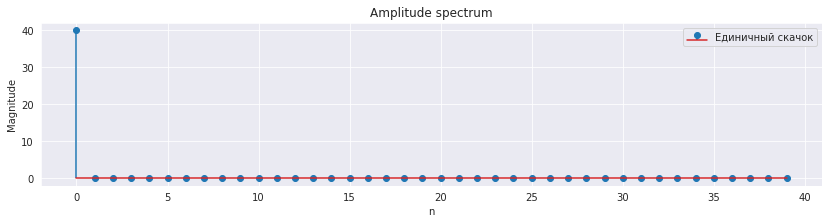

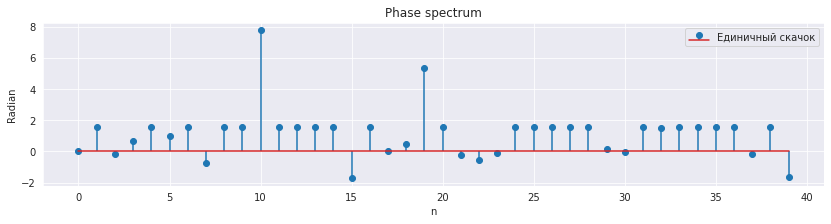

In [429]:
draw_spec(DFT(signals["Единичный скачок"]), name="Единичный скачок")

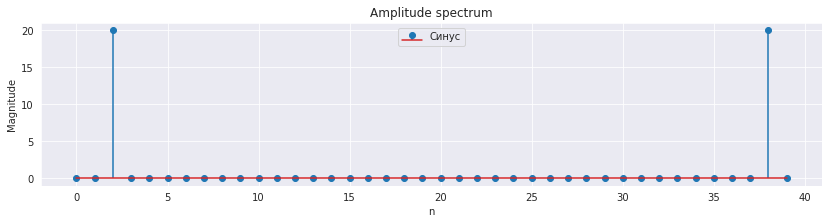

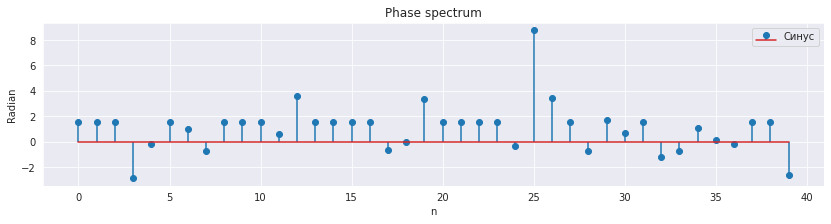

In [430]:
draw_spec(DFT(signals["Синус"]), name="Синус")

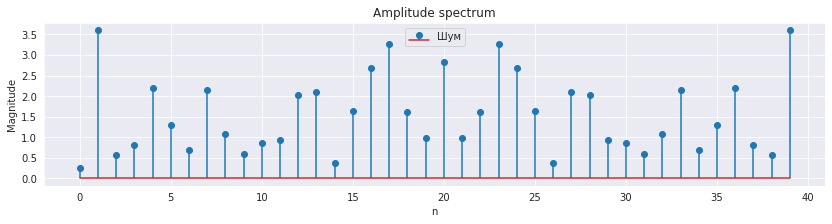

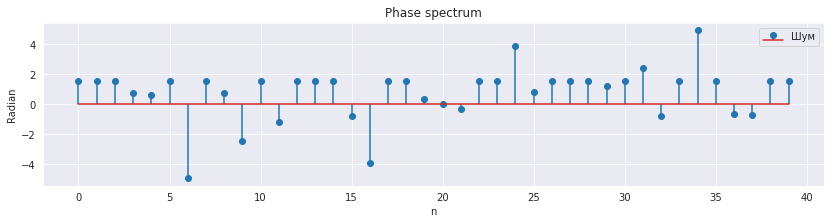

In [431]:
draw_spec(DFT(signals["Шум"]), name="Шум")

### 1.Почему амплитуда всех гармоник единичного импульса равна константе?

Потому что в таком случае $x_n$ из формулы для дискретного преобразования Фурье равна 1, соответственно
$$ X_k = \sum_{n=0}^{N-1} e^{-i \frac{2\pi}{N} k n} = e^{-i \frac{2\pi}{N} k \sum_{n=0}^{N-1}n} $$
Таким образом, гармоники единичного импульса представляют собой экспоненту в степени комплексная единица, умноженная на некоторое число. Как и видно на графике, у такого выражения модуль будет равен 1.

### 2. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый?

По амплитудному спектру можно понять, какие гармоники в принципе есть в сигнале, насколько сильно они выражены. Фазовый спектр дает представление о их фазовом сдвиге, в отличие от амплитудного спектра, он зависит от времени и может дать понимание того, какой "временной отрезок" гармоники мы слышим. Фазовый спектр не так слышен человеческому уху, поэтому там заметны только резкие изменения.

### 3. Как перевести номер отсчета в частоту?

По амплитудному спектру смотрим на номер гармоники $k$. По своей сути перобразование Фурье - это переход к другому базису, $X_k$ соответствует множителю при $e^{-i \frac{2\pi}{N} k$.
Следовательно, круговая частота равна
$$\omega = \frac{2\pi k}{N}$$

Если же мы говорим об исходной частоте сигнала, то для того, чтобы ее найти, нужно знать частоту дискретизации $f_d$, итого формула
$$f =\frac{k\cdot f_d}{N}$$

### 4. Что в фазовом спектре является полезной информацией, а что - шумом? Почему?

Обычно шум находят по амплитудному спектру, или просто отсекая слишком большие или маленькие частоты. Можно по амплитуде найти соответсвующую фазу, являющуюся шумом. Также по графику шума выше возникает ощущение, что у шума фазы маленькие и примерно одинаковые.

# Оконное преобразование Фурье
Преобразование Фурье делает переход из временной области в частотную, позволяя анализировать составляющие сигнал гармоники. Однако это не всегда удобно. В реальных сигналах зачастую составляющие их гармоники изменяются со временем. Например, каждая буква в слове имеет свой набор основных гармоник, и простое преобразование Фурье не сильно поможет нам определить, что было сказано. Для того, чтобы анализировать такие сигналы, обычно используется [Оконное преобразование Фурье](https://ru.wikipedia.org/wiki/Оконное_преобразование_Фурье). Такое преобразование позволяет анализировать гармоники сигнала в коротких промежутках времени и сохранить временную ось при построении спектрограммы.
# Задание 3 (2 балла)
Реализовать оконное преобразование Фурье (Short-time Fourier transform), пользуясь только библиотеками *numpy* и *scipy*. Сравнить с *librosa.stft*


In [412]:
def STFT(x, n_fft=2048, hop_length=4, window='hann'):
    # x - signal
    # n_fft - fft window size 
    # hop_length - step size between ffts
    # window - window type. See scipy.signal.get_window
    # return spectrogram

    l = x.shape[0]
    M = l//hop_length + 1
    X = np.zeros((M, int(n_fft/2)+1), dtype=complex)
    w = scipy.signal.get_window(window, n_fft)

    for m in range(M):
        k = np.arange(int(n_fft/2)+1)
        n = np.arange(n_fft)
        L = np.exp(-2*np.pi*n*k.reshape(-1, 1)*1j/n_fft)*w
        start = m*hop_length-n_fft//2
        end = m*hop_length+n_fft//2
        z = x[max(start, 0):end]
        #паддинг в начале
        if m < M//2 and len(z) < n_fft:
            z = np.hstack((np.zeros(n_fft-len(z)), z))
        #паддинг в конце
        if m > M//2  and len(z) < n_fft:
            z = np.hstack((z, np.zeros(n_fft-len(z))))
        X[m]=L@z
    return X.T

In [413]:
def test_stft(x, n_fft=2048, hop_length=512, window='hann'):
    librosa_result = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
    result = STFT(x, n_fft=n_fft, hop_length=hop_length, window='hann')
    if librosa_result.shape != result.shape:
        print(f"Your shape {result.shape} != librosa stft shape {librosa_result.shape} ")
        return -1 
    if not np.allclose(librosa_result, result):
        print(f"Wrong results. Diff {np.abs(librosa_result-result)}")
        return -2
    return 0
        
for name, sig in signals.items():
    print(f"Checking '{name}'")
    for n_fft in (8, 4):
        for hop_length in (n_fft//4, n_fft//2):
            print(n_fft, hop_length)
            assert test_stft(sig, n_fft=n_fft, hop_length=hop_length)==0, \
                f"Test failed. Params n_fft {n_fft}. Hop_length {hop_length}"
    print("ok")
print("All ok!")

Checking 'Единичный импульс'
8 2
8 4
4 1
4 2
ok
Checking 'Единичный скачок'
8 2
8 4
4 1
4 2
ok
Checking 'Синус'
8 2
8 4
4 1
4 2
ok
Checking 'Шум'
8 2
8 4
4 1
4 2
ok
All ok!


Определим функцию для отрисовки

In [410]:
# Определим функцию для отрисовки
def draw_stft(X, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    # X - комплекстная спектрограмма 
    # Для получения энергии достаточно взять модуль
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()

# Анализ сигналов
Теперь можно приступить к анализу звуковых сигналов.
Во время анализа сигналов нам понадобятся все определенные выше инструменты. 


----------------------------------
## Анализ паровозного гудка
Начнем с простого сигнала, состоящего из нескольких основных гармоник и шума.

Загрузим аудио файл с паровозным гудком

Len is 82175 ( ). Sample rate is 22050


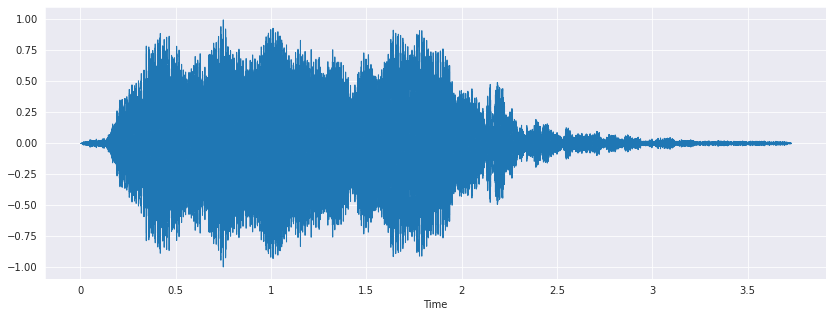

In [133]:
# Загрузим аудио файл с паровозным гудком
train_whistle, tw_sr = librosa.core.load("resources/train_whistle.wav")
print(f"Len is {len(train_whistle)} ( ). Sample rate is {tw_sr}")
player = ipd.Audio(train_whistle, rate=tw_sr)
ipd.display(player)
draw_waveform(train_whistle, sr=tw_sr)

Построим гудок паровоза в частотной области

Гудок паровоза в частотной области


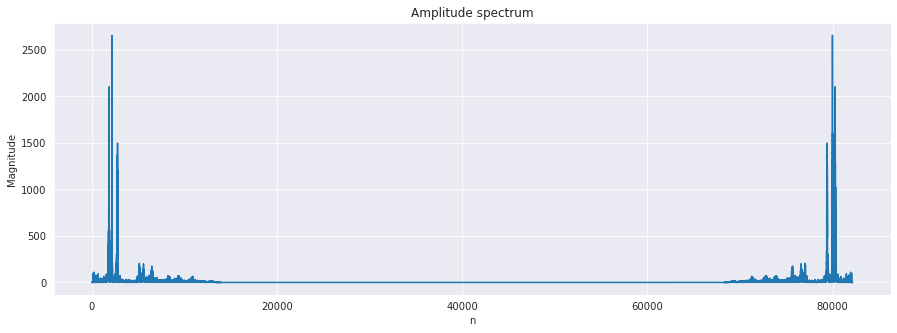

In [134]:
train_whistle_spec = scipy.fft.fft(train_whistle)
print("Гудок паровоза в частотной области")
draw_spec(train_whistle_spec, draw_p=False, figsize=(15,5))

# Задание 4 (2 балла)
Определите 3 основные гармоники паровозного гудка.

Ответ округлите до двух знаков после запятой.


Амплитудный спектр: посмотрим поближе

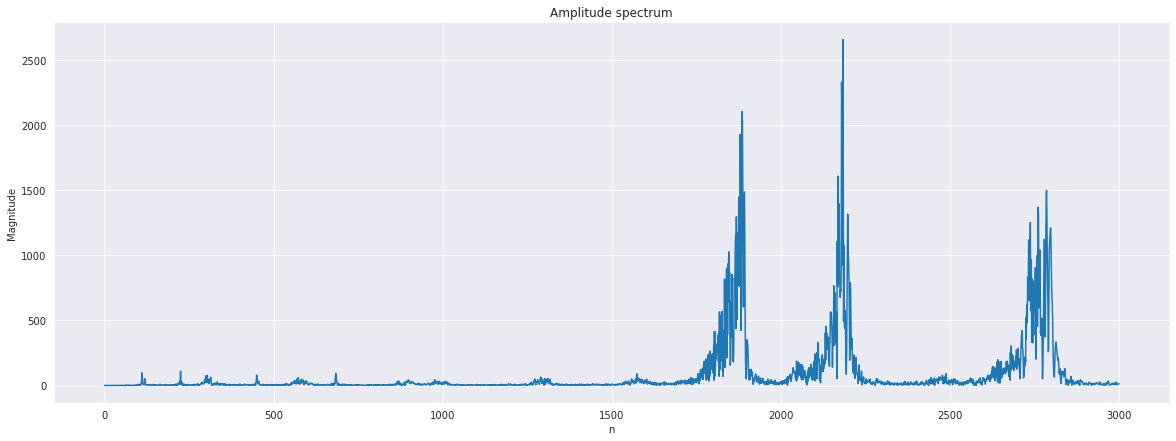

In [316]:
draw_spec(train_whistle_spec[0:3000], draw_p=False, figsize=(20, 7))
freq = []

Теперь все три гармоники видны, рассмотрим каждую отдельно

### 1 гармоника

In [317]:
f1 = np.around((np.argmax(train_whistle_spec[1500:2000])+1500)*tw_sr/len(train_whistle),2)
freq.append(f1)
f1

505.8

### 2 гармоника

In [318]:
f2 = np.around((np.argmax(train_whistle_spec[2000:2500])+2000)*tw_sr/len(train_whistle),2)
freq.append(f2)
f2

585.76

### 3 гармоника

In [319]:
f3 = np.around((np.argmax(train_whistle_spec[2500:3000])+2500)*tw_sr/len(train_whistle),2)
freq.append(f3)
f3

747.3

### Тест

In [320]:
task_answer = freq
freq

[505.8, 585.76, 747.3]

In [321]:
assert type(task_answer) == list or type(task_answer) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(task_answer)}"
assert len(task_answer) == 3, \
        f"Wrong len {len(task_answer)}."
assert (round(sum(task_answer)) == 1677 and round(np.var(task_answer)) == 1407) or \
        (abs(sum(task_answer)  - 1836) <= 3 and abs(np.var(task_answer) - 10153) <= 181), \
        f"Wrong freqs"
print("Correct!")       

Correct!


Теперь попробуйте сгенерировать сигнал, состоящий только из этих гармоник. Воспроизведите сигнал.

In [324]:
from IPython.display import Audio
l = len(train_whistle)
s = np.zeros(l)
for f in task_answer:
    s += np.cos(2 * np.pi * f / tw_sr * np.arange(l))
Audio(data=s, rate= tw_sr)

# Анализ двухтонального многочастотного сигнала
Теперь расмотрим более сложный сигнал - [DTMF](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling). Такие сигналы используются для автоматизации набора телефонного номера. 

# Задание 5 (2 балла)
В данном аудио закодирован трехзначный номер. Используя таблицу с [wiki](https://ru.wikipedia.org/wiki/DTMF) определите, что за номер закодирован.


Визуализация

Len is 243102. Sample rate is 22050


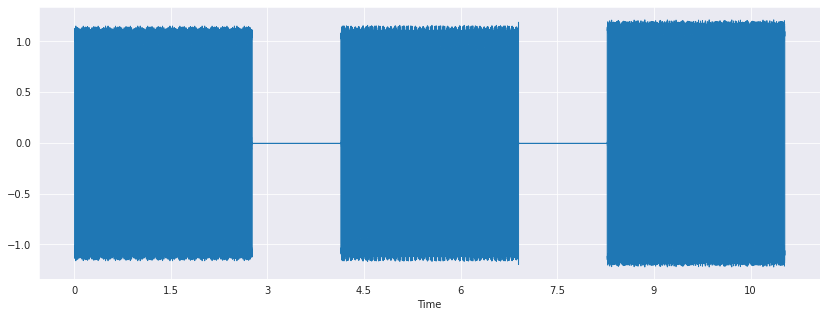

In [202]:
#dtmf.wav
dtmf, dtmf_sr = librosa.core.load("resources/dtmf.wav")
print(f"Len is {len(dtmf)}. Sample rate is {dtmf_sr}")
player = ipd.Audio(dtmf, rate=dtmf_sr)
ipd.display(player)
draw_waveform(dtmf, sr=dtmf_sr)

Для того, чтобы найти составляющие для каждой цифры номера, возьмем окно в каждой из трех частей сигнала и применим к нему дискретное преобразование Фурье, посмотрим на амплитудный спектр, выберем две самые выраженные гармоники и через их номер найдем соответствующие частоты по формуле $f = \frac{k}{N}f_d$, где $f_d$ - частота дискретизации, а $N$ - длина сигнала

### 1 число

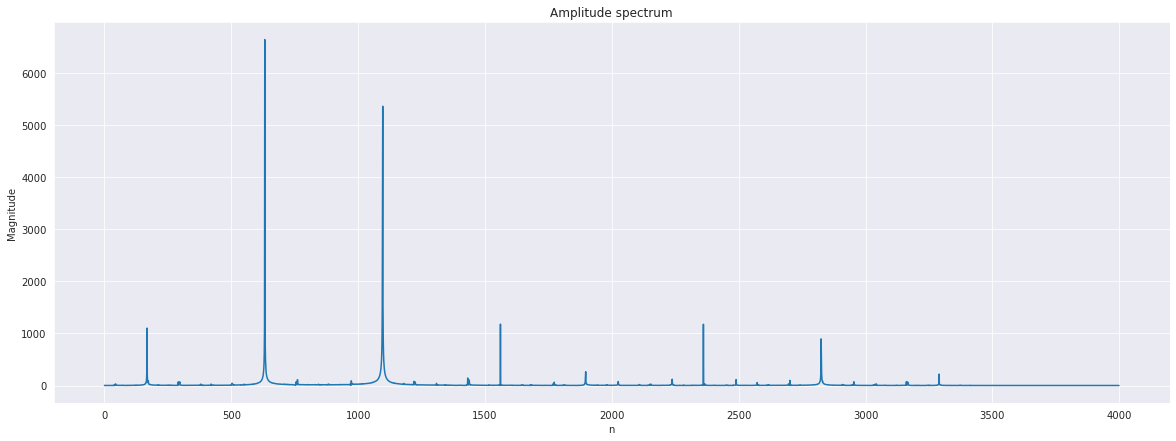

In [210]:
draw_spec(scipy.fft.fft(dtmf[20000:40000])[:4000], draw_p=False, figsize=(20, 7))

В спектре есть две заметные гармоники. Переведем ось x из номера гармоники в частоту, для этого немного была изменена функция `draw_spec`

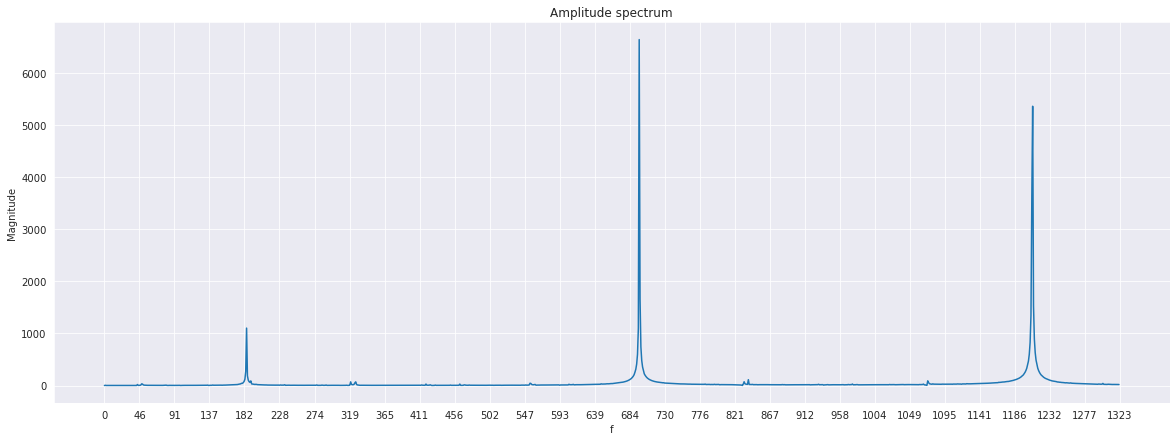

In [212]:
draw_spec(scipy.fft.fft(dtmf[20000:40000])[:1200], draw_p=False, figsize=(20, 7), rescale=dtmf_sr/20000)

При помощи таблицы оценили частоты - это 697 и 1209 Гц, что соответствует цифре 1.

### 2 число

Делаем все то же самое.

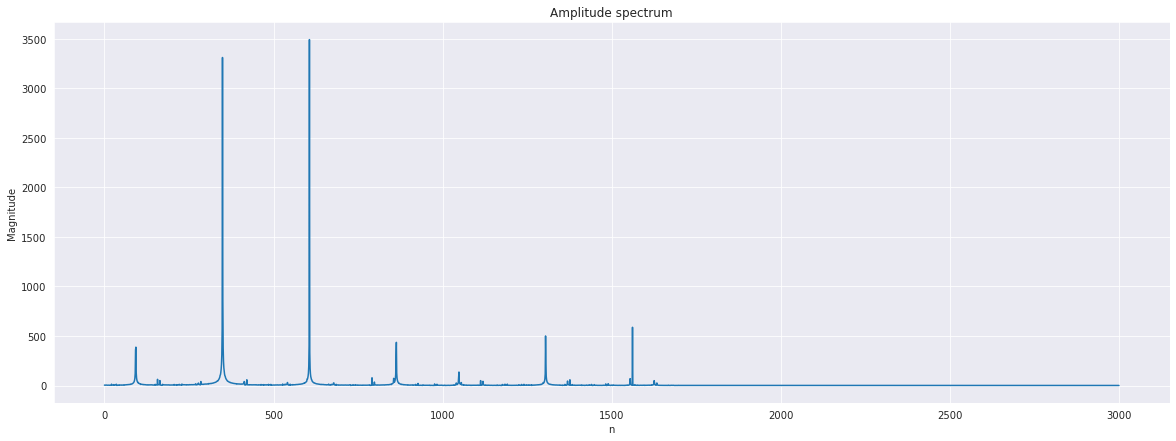

In [213]:
draw_spec(scipy.fft.fft(dtmf[110000:120000])[:3000], draw_p=False, figsize=(20, 7))

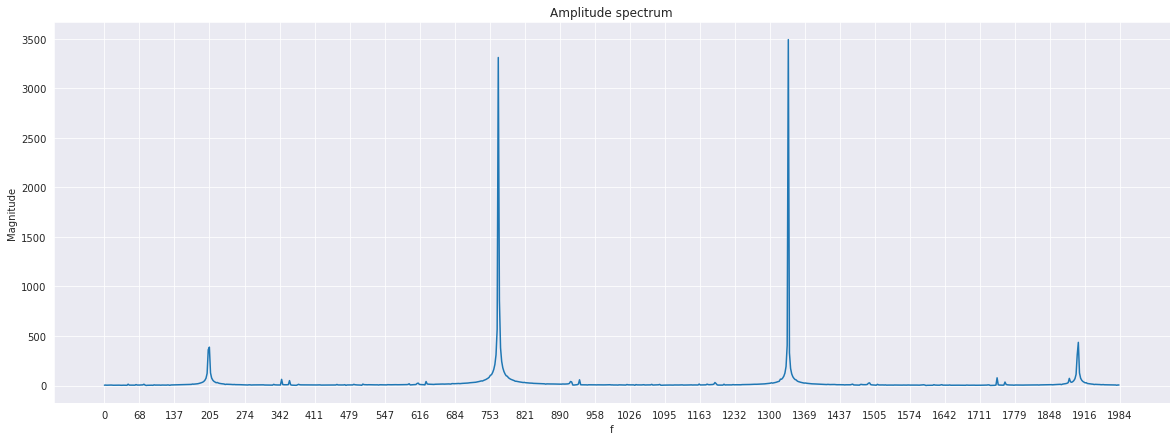

In [215]:
draw_spec(scipy.fft.fft(dtmf[110000:120000])[:900], draw_p=False, figsize=(20, 7), rescale=dtmf_sr/10000)

Частоты 770 и 1336 Гц, это цифра 5.

### 3 число

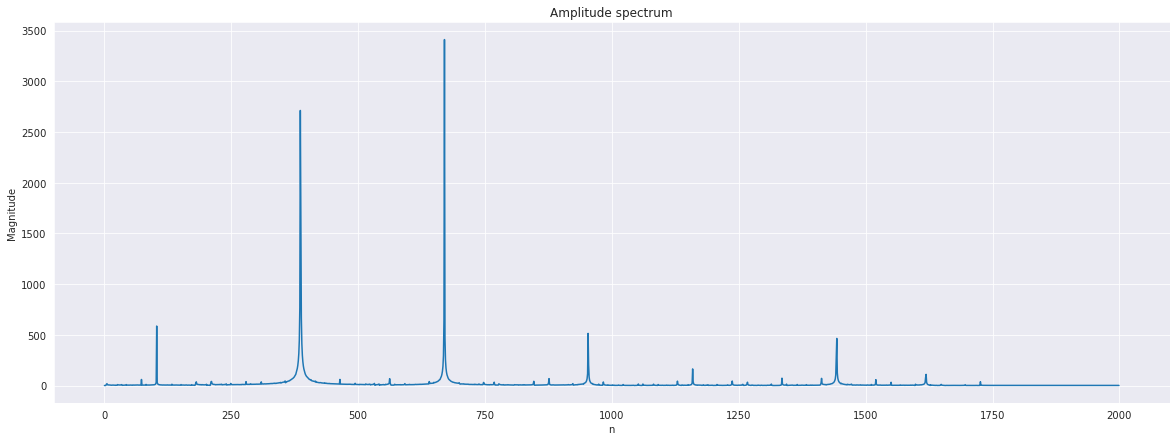

In [216]:
draw_spec(scipy.fft.fft(dtmf[190000:200000])[:2000], draw_p=False, figsize=(20, 7))

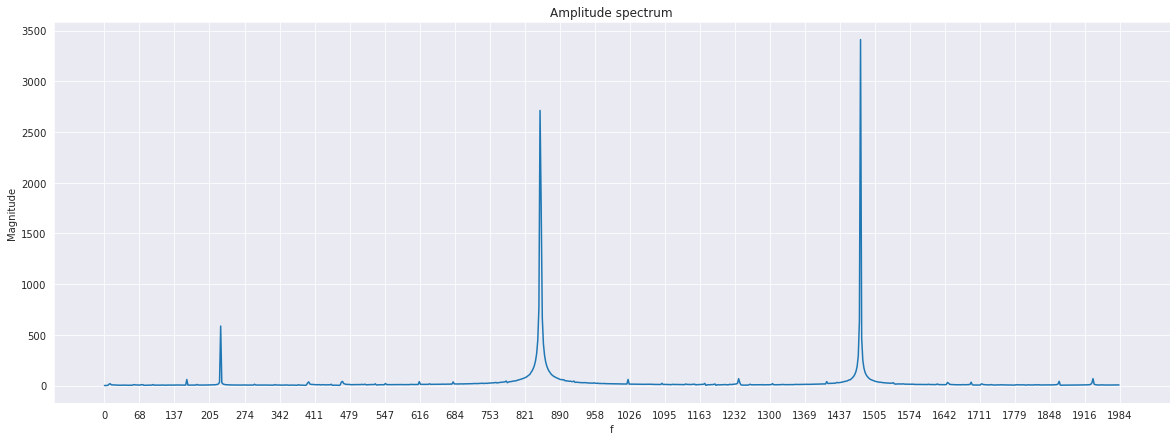

In [214]:
draw_spec(scipy.fft.fft(dtmf[190000:200000])[:900], draw_p=False, figsize=(20, 7), rescale=dtmf_sr/10000)

Частоты 852 и 1477 Гц, это цифра 9.

### Тест

In [217]:
 phone_number = [1, 5, 9]

In [218]:
assert type(phone_number) == list or type(phone_number) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(phone_number)}"
assert len(phone_number) == 3, \
        f"Wrong len {len(phone_number)}."
assert round(np.mean(phone_number)) == 5 and round(np.var(phone_number)) == 11 , \
        f"Wrong number"
assert hashlib.md5(''.join(map(str, phone_number)).encode()).hexdigest() == "140f6969d5213fd0ece03148e62e461e", \
        f"Wrong hash. How did you pass mean/var test?"
print("Correct!")

Correct!
